# Files and formats

So far we worked with flat files and csv files. Today we talk a bit more about JSON, and Web API's

Pandas has a number of methods for reading tabular data as a DataFrame object. 

        read_csv
        read_fwf
        read_clipboard
        read_excel
        read_hdf
        read_html
        read_json
        read_msgpack
        read_pickle
        read_sas
        read_sql
        read_stata
        read_feather
        
So far we used most of the time `read_csv`, `read_fwf`, `read_excel`. We experienced that data can be very messy and that we need a lot of different parameters to perform a nice read without errors. Sometimes the data is seperated by variable amount of whitespaces. In these cases we can pass a regular expression as a delimiter for read_csv. 

        data = pd.read_csv('example.txt', sep = '\s+')
        
Other handy methods are

        na_values
        skiprows
        sep
        nrows
        chunksize
        skip_footer
        encoding
        
    
      

## JSON Data

https://www.youtube.com/watch?v=EfEm0g-bMPc

JSON has become one of the standard for sending http requests between webbrowsers and other applications. JSON is very nearly valid Python code using basic types like dictionaries, arrays, strings, numbers and booleans. So far we used `json.loads()` and `json.dumps()` to read and write json files. JSON data can be converted to a dataframe using the built in pandas `pd.read_json` method

In [1]:
import json
db = json.load(open('../data/food.json'))
print(db[0:1])
#each entry is a dict, so we select one of these
db[0].keys()

[{'id': 1008, 'description': 'Cheese, caraway', 'tags': [], 'manufacturer': '', 'group': 'Dairy and Egg Products', 'portions': [{'amount': 1, 'unit': 'oz', 'grams': 28.35}], 'nutrients': [{'value': 25.18, 'units': 'g', 'description': 'Protein', 'group': 'Composition'}, {'value': 29.2, 'units': 'g', 'description': 'Total lipid (fat)', 'group': 'Composition'}, {'value': 3.06, 'units': 'g', 'description': 'Carbohydrate, by difference', 'group': 'Composition'}, {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'}, {'value': 376.0, 'units': 'kcal', 'description': 'Energy', 'group': 'Energy'}, {'value': 39.28, 'units': 'g', 'description': 'Water', 'group': 'Composition'}, {'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'}, {'value': 0.0, 'units': 'g', 'description': 'Fiber, total dietary', 'group': 'Composition'}, {'value': 673.0, 'units': 'mg', 'description': 'Calcium, Ca', 'group': 'Elements'}, {'value': 0.64, 'units': 'mg', 'description': 'Iron, 

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [2]:
import pandas as pd
df = pd.read_json('../data/food.json')
df.head()

,id,description,tags,manufacturer,group,portions,nutrients
0,1008,"Cheese, caraway",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]","[{'value': 25.18, 'units': 'g', 'description':..."
1,1009,"Cheese, cheddar",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'cup, diced', 'grams': ...","[{'value': 24.9, 'units': 'g', 'description': ..."
2,1018,"Cheese, edam",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 4.22, 'units': 'g', 'description': ..."
3,1019,"Cheese, feta",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'cup, crumbled', 'grams...","[{'value': 5.2, 'units': 'g', 'description': '..."
4,1028,"Cheese, mozzarella, part skim milk",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]","[{'value': 3.27, 'units': 'g', 'description': ..."


The disadvantage of `pd.read_json` is that we create columns with dictionaries. Better is to select the nutrients information from the column and put it in a different dataframe along with the `id` number, so that we can combine the two afterwards. Below you see how the first row and column cell is selected and put in a dataframe. 

In [3]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients.head(10)

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy
7,0.00,g,"Fiber, total dietary",Composition
8,673.00,mg,"Calcium, Ca",Elements
9,0.64,mg,"Iron, Fe",Elements


To do this for the entire dataframe we need to loop through the dataframe and put each nutrients cell in a dataframe, add the `id` column for identification purpose. If we first create a list of all these dataframes and then concat them we have one single dataframe for all the nutrients cells in the original dataframe.

In [4]:
nutrients = []
for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [5]:
nutrients[150:250]

,value,units,description,group,id
150,0.952,g,Arginine,Amino Acids,1008
151,0.884,g,Histidine,Amino Acids,1008
152,0.711,g,Alanine,Amino Acids,1008
153,1.618,g,Aspartic acid,Amino Acids,1008
154,6.160,g,Glutamic acid,Amino Acids,1008
...,...,...,...,...,...
245,403.000,kcal,Energy,Energy,1009
246,0.240,g,Sucrose,Sugars,1009
247,0.230,g,Lactose,Sugars,1009
248,0.150,g,Maltose,Sugars,1009


In [6]:
#check for duplicates
print(len(nutrients))
nutrients.duplicated().sum()

389355


14179

In [7]:
nutrients = nutrients.drop_duplicates()

In [8]:
print(len(nutrients))
nutrients.duplicated().sum()

375176


0

Since we put the nutrients info in a seperate dataframe we can eliminate that from the original database

In [9]:
columns_to_keep = ['description',
                   'group',
                   'id',
                   'manufacturer']
df = df[columns_to_keep]
df.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


Now we reduced the dimensions in the dataframes we can easily merge them. First we rename the columns that are in both dataframes 

In [10]:
df = df.rename(columns = {'description':'food', 'group':'food_group'}, copy = False)

In [11]:
df.head()

,food,food_group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [12]:
nutrients = nutrients.rename(columns = {'description':'nutrients', 'group': 'nutrient_group'})
nutrients.head()

,value,units,nutrients,nutrient_group,id
0,25.18,g,Protein,Composition,1008
1,29.20,g,Total lipid (fat),Composition,1008
2,3.06,g,"Carbohydrate, by difference",Composition,1008
3,3.28,g,Ash,Other,1008
4,376.00,kcal,Energy,Energy,1008


In [13]:
ndata = pd.merge(nutrients, df, on='id', how='outer')
ndata.head(20)

,value,units,nutrients,nutrient_group,id,food,food_group,manufacturer
0,25.180,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.200,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.060,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.280,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.000,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,
5,39.280,g,Water,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
6,1573.000,kJ,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,
7,0.000,g,"Fiber, total dietary",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
8,673.000,mg,"Calcium, Ca",Elements,1008,"Cheese, caraway",Dairy and Egg Products,
9,0.640,mg,"Iron, Fe",Elements,1008,"Cheese, caraway",Dairy and Egg Products,


With the merged data we can conduct any analysis we like

<IPython.core.display.Javascript object>


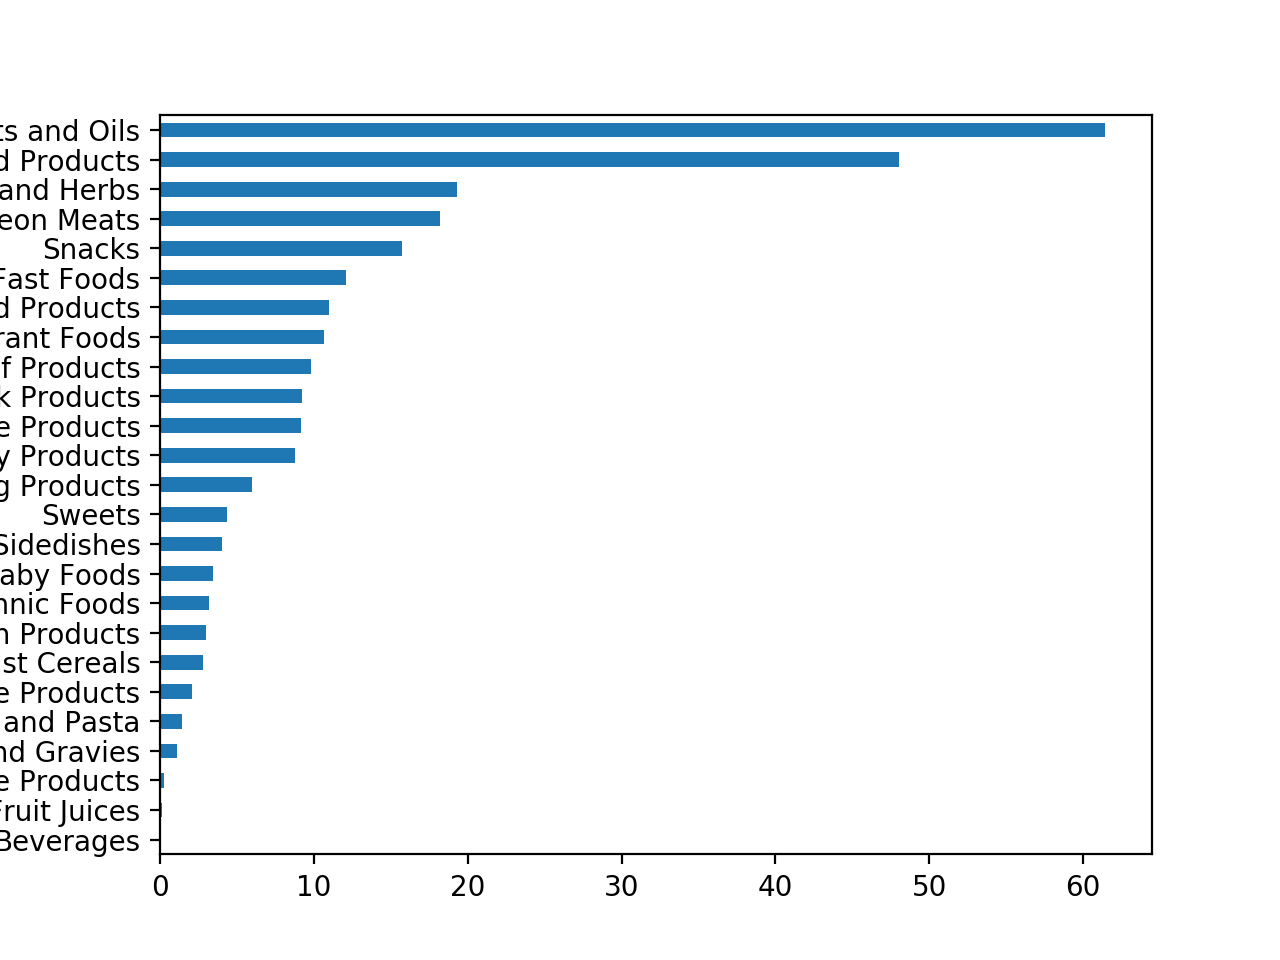

In [14]:
%matplotlib notebook
result = ndata.groupby(['nutrients', 'food_group'])['value'].quantile(0.5)
result['Total lipid (fat)'].sort_values().plot(kind='barh')